In [1]:
import torch
from torch.optim import Adam
from torch.nn import Linear, MSELoss, Sequential, Sigmoid, Softmax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sb

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.datasets import load_iris

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame( iris['data'] )
df.columns = iris['feature_names']
df['species'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


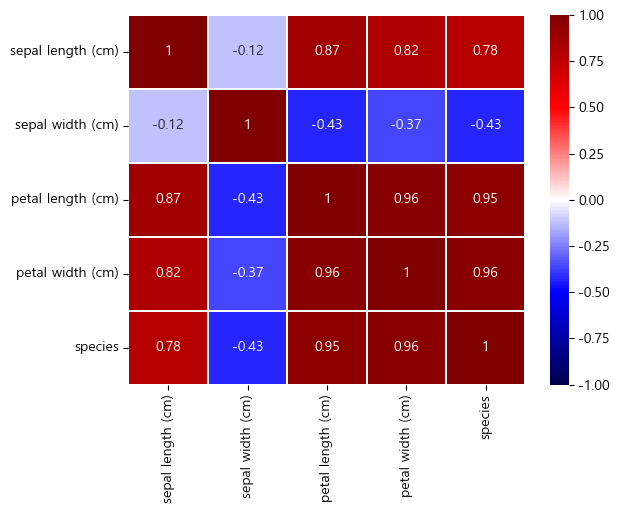

In [7]:
sb.heatmap( df.corr(), vmin=-1, vmax=1, annot=True,
           linewidths=0.2, cmap='seismic' )
plt.show()

In [8]:
y_onehot = pd.get_dummies(df['species'])
y_onehot

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [9]:
x_data = df.iloc[:,:-1].values
y_onehot = pd.get_dummies(df['species'])
y_data = y_onehot.values

In [10]:
x = torch.FloatTensor(x_data)
y = torch.FloatTensor(y_data)

In [11]:
model = Sequential()
model.add_module('nn1', Linear(4,3)) # (특성갯수, 라벨 갯수) w: 특성갯수 x 라벨 갯수, b: 라벨 갯수
model.add_module('softmax', Softmax(dim=1)) # 할성함수
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [12]:
hist=[]
for epoch in range(2000):
    optimizer.zero_grad()
    hx = model.forward(x) 
    # z = torch.matmul(x,w)+b
    # hx = Softmax(z)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    print(epoch, cost.item())
    hist.append(cost.item())

0 1.2128397226333618
1 1.2116328477859497
2 1.2101562023162842
3 1.2083532810211182
4 1.206156849861145
5 1.203488826751709
6 1.200261116027832
7 1.1963777542114258
8 1.1917437314987183
9 1.1862787008285522
10 1.1799322366714478
11 1.1727254390716553
12 1.1647930145263672
13 1.1562871932983398
14 1.1472880840301514
15 1.137992262840271
16 1.1286563873291016
17 1.1194239854812622
18 1.1102432012557983
19 1.101043939590454
20 1.0920614004135132
21 1.0838993787765503
22 1.0771669149398804
23 1.071934700012207
24 1.067604422569275
25 1.0633256435394287
26 1.0584051609039307
27 1.0524708032608032
28 1.0454457998275757
29 1.0374592542648315
30 1.0287657976150513
31 1.0196864604949951
32 1.0105568170547485
33 1.001678466796875
34 0.9932749271392822
35 0.9854608178138733
36 0.9782338738441467
37 0.9714921116828918
38 0.965073823928833
39 0.9588083028793335
40 0.9525651335716248
41 0.9462864995002747
42 0.9399968385696411
43 0.9337862133979797
44 0.9277791380882263
45 0.9220942258834839
46 0.91

380 0.655670702457428
381 0.6554518342018127
382 0.6552338004112244
383 0.6550168991088867
384 0.6548009514808655
385 0.6545858383178711
386 0.6543717980384827
387 0.6541586518287659
388 0.6539464592933655
389 0.6537351012229919
390 0.6535247564315796
391 0.6533153653144836
392 0.6531068682670593
393 0.6528992652893066
394 0.6526925563812256
395 0.6524868011474609
396 0.6522819399833679
397 0.6520779132843018
398 0.651874840259552
399 0.6516726016998291
400 0.6514711976051331
401 0.6512706875801086
402 0.6510711312294006
403 0.6508724093437195
404 0.6506744623184204
405 0.6504774689674377
406 0.6502811908721924
407 0.6500858068466187
408 0.6498912572860718
409 0.6496975421905518
410 0.6495047211647034
411 0.6493126153945923
412 0.6491213440895081
413 0.6489309072494507
414 0.6487412452697754
415 0.6485524773597717
416 0.6483643054962158
417 0.6481770277023315
418 0.6479906439781189
419 0.6478049159049988
420 0.6476199626922607
421 0.6474357843399048
422 0.6472525000572205
423 0.6470698

747 0.6122488379478455
748 0.6121864318847656
749 0.6121243238449097
750 0.6120622754096985
751 0.6120004057884216
752 0.6119387745857239
753 0.6118772625923157
754 0.6118159294128418
755 0.6117547750473022
756 0.611693799495697
757 0.6116328835487366
758 0.6115720868110657
759 0.6115115880966187
760 0.6114512085914612
761 0.611391007900238
762 0.6113308668136597
763 0.6112710237503052
764 0.6112112998962402
765 0.6111516356468201
766 0.6110921502113342
767 0.6110328435897827
768 0.6109737753868103
769 0.6109147667884827
770 0.6108559370040894
771 0.6107971668243408
772 0.6107386350631714
773 0.6106802821159363
774 0.6106220483779907
775 0.6105639934539795
776 0.6105060577392578
777 0.6104482412338257
778 0.6103906035423279
779 0.6103331446647644
780 0.6102757453918457
781 0.6102185249328613
782 0.6101614832878113
783 0.6101046204566956
784 0.6100478172302246
785 0.6099912524223328
786 0.6099347472190857
787 0.609878420829773
788 0.6098222136497498
789 0.6097661852836609
790 0.60971021

1169 0.5954526662826538
1170 0.5954275131225586
1171 0.5954022407531738
1172 0.5953770875930786
1173 0.595352053642273
1174 0.5953269600868225
1175 0.5953019261360168
1176 0.595276951789856
1177 0.5952520370483398
1178 0.5952271223068237
1179 0.5952023267745972
1180 0.5951775312423706
1181 0.5951526761054993
1182 0.5951279997825623
1183 0.5951033234596252
1184 0.595078706741333
1185 0.5950540900230408
1186 0.5950295329093933
1187 0.5950050354003906
1188 0.5949805974960327
1189 0.5949562191963196
1190 0.5949317216873169
1191 0.5949074029922485
1192 0.594883143901825
1193 0.5948588848114014
1194 0.594834566116333
1195 0.5948105454444885
1196 0.5947863459587097
1197 0.5947622656822205
1198 0.5947381854057312
1199 0.5947141647338867
1200 0.594690203666687
1201 0.5946663022041321
1202 0.5946424007415771
1203 0.594618558883667
1204 0.5945947170257568
1205 0.5945709943771362
1206 0.5945472121238708
1207 0.5945236086845398
1208 0.594499945640564
1209 0.5944763422012329
1210 0.5944527387619019


1564 0.5880289673805237
1565 0.5880149602890015
1566 0.588001012802124
1567 0.5879870057106018
1568 0.5879731178283691
1569 0.5879591703414917
1570 0.587945282459259
1571 0.5879313945770264
1572 0.5879175066947937
1573 0.5879036784172058
1574 0.5878899097442627
1575 0.5878760814666748
1576 0.5878623723983765
1577 0.5878484845161438
1578 0.5878347754478455
1579 0.5878210663795471
1580 0.5878073573112488
1581 0.5877936482429504
1582 0.5877799987792969
1583 0.5877662897109985
1584 0.5877525806427002
1585 0.5877389311790466
1586 0.5877254009246826
1587 0.5877118110656738
1588 0.587698221206665
1589 0.587684690952301
1590 0.5876710414886475
1591 0.5876575708389282
1592 0.587644100189209
1593 0.5876305103302002
1594 0.5876170992851257
1595 0.5876036286354065
1596 0.5875901579856873
1597 0.5875768065452576
1598 0.5875633358955383
1599 0.5875499248504639
1600 0.587536633014679
1601 0.5875232219696045
1602 0.5875099301338196
1603 0.5874965786933899
1604 0.5874832272529602
1605 0.587469995021820

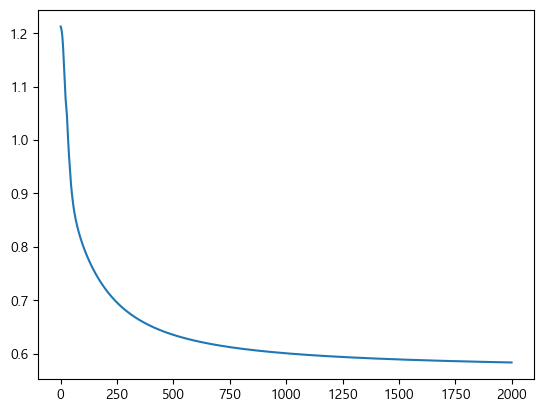

In [13]:
plt.plot(hist)
plt.show()

In [15]:
# p = model.forward(x[0].reshape(1,4)) # vector to matrix (1행 4열) 여기서 4는 특성 갯수 
p = model.forward(x[0].reshape(1,-1)) # vector to matrix (1행 4열) 여기서 -1을 쓰면 알아서 맞춰줌
p

tensor([[9.9904e-01, 9.6391e-04, 2.0011e-16]], grad_fn=<SoftmaxBackward0>)

In [18]:
idx = p.argmax(dim=1)

In [20]:
targetName = iris['target_names']
targetName[idx]

'setosa'